In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn.preprocessing import MinMaxScaler

https://finance.yahoo.com/quote/GOOG/history?period1=1095552000&period2=1570406400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [11]:
path = "/content/GOOG.csv"
df = pd.read_csv(path,parse_dates=True)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3783,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3784,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3785,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3786,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3787,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1162400


In [12]:
df_training = df[df["Date"] < "2019-01-01"].copy()
df_training.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3591,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3592,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3593,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3594,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800
3595,2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300


In [13]:
df_testing = df[df["Date"] >= "2019-01-01" ].copy()
df_testing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3596,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3597,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3598,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3599,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3600,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [14]:
training_data = df_training.drop(["Date", "Adj Close"], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,58.256641,60.572960,58.166977,59.457142,10679279
1,59.681301,59.985161,58.535595,58.699978,7263122
2,58.480801,59.611561,58.186901,58.968971,7617245
3,59.198112,61.086037,58.291508,60.184414,8576226
4,60.244190,61.818291,59.656391,59.691261,9166831


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
training_data = scaler.fit_transform(training_data)
training_data[:4]

array([[0.00000000e+00, 7.91745087e-04, 0.00000000e+00, 6.25946788e-04,
        1.29296952e-01],
       [1.17474154e-03, 3.07672428e-04, 3.09541133e-04, 0.00000000e+00,
        8.79059004e-02],
       [1.84837128e-04, 0.00000000e+00, 1.67308637e-05, 2.22376268e-04,
        9.21965472e-02],
       [7.76315115e-04, 1.21428161e-03, 1.04572937e-04, 1.22718189e-03,
        1.03815812e-01]])

In [16]:
X_train = []
y_train = []

In [17]:
training_data.shape[0]

3596

In [18]:
for i in range(60, training_data.shape[0]):

    X_train.append(training_data[i - 60 : i ])

    # Open Zamanını Öğrenmek istiyorum !!!
    y_train.append(training_data[i, 0])

In [19]:
X_train , y_train = np.array(X_train), np.array(y_train)

X_train.shape , y_train.shape

((3536, 60, 5), (3536,))

# Building LSTM

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

In [21]:
regressior = Sequential()

regressior.add(LSTM(units = 50, activation="relu",return_sequences=True, input_shape = (60, 5)))
regressior.add(Dropout(rate = 0.2))

regressior.add(LSTM(units = 60, activation="relu",return_sequences=True))
regressior.add(Dropout(rate = 0.3))

regressior.add(LSTM(units = 80, activation="relu",return_sequences=True))
regressior.add(Dropout(rate = 0.4))

regressior.add(LSTM(units = 120, activation="relu"))
regressior.add(Dropout(rate = 0.5))

regressior.add(Dense(units = 1))

regressior.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [22]:
regressior.compile(optimizer = "adam", loss = "mean_squared_error",metrics = ["mse"])

history = regressior.fit(X_train, y_train, epochs = 10 , batch_size = 32)

Epoch 1/10
111/111 [==============================] - 79s 650ms/step - loss: 0.0183 - mse: 0.0183
Epoch 2/10
111/111 [==============================] - 73s 659ms/step - loss: 0.0045 - mse: 0.0045
Epoch 3/10
111/111 [==============================] - 73s 659ms/step - loss: 0.0046 - mse: 0.0046
Epoch 4/10
111/111 [==============================] - 73s 658ms/step - loss: 0.0041 - mse: 0.0041
Epoch 5/10
111/111 [==============================] - 73s 656ms/step - loss: 0.0034 - mse: 0.0034
Epoch 6/10
111/111 [==============================] - 71s 643ms/step - loss: 0.0031 - mse: 0.0031
Epoch 7/10
111/111 [==============================] - 73s 655ms/step - loss: 0.0033 - mse: 0.0033
Epoch 8/10
111/111 [==============================] - 72s 649ms/step - loss: 0.0028 - mse: 0.0028
Epoch 9/10
111/111 [==============================] - 72s 648ms/step - loss: 0.0028 - mse: 0.0028
Epoch 10/10
111/111 [==============================] - 72s 650ms/step - loss: 0.0025 - mse: 0.0025


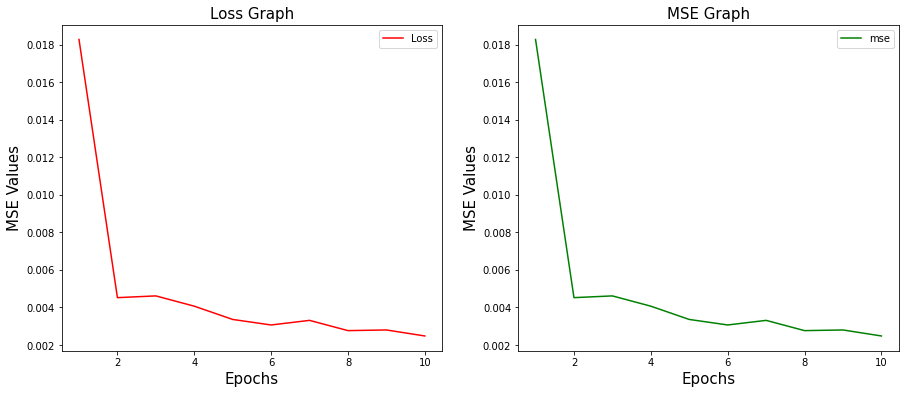

In [23]:
# Aynı Zaten !!!

epochs= 10
size = 15
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
plt.plot(range(1,epochs+1), history.history["loss"], label = "Loss",color = "r")
plt.legend(loc = "best")
plt.ylabel("MSE Values",fontsize = size)
plt.xlabel("Epochs",fontsize = size)
plt.title("Loss Graph",fontsize = size)

plt.subplot(1,2,2)
plt.plot(range(1,epochs+1), history.history["mse"], label = "mse",color = "g")
plt.legend(loc = "best")
plt.ylabel("MSE Values",fontsize = size)
plt.xlabel("Epochs",fontsize = size)
plt.title("MSE Graph",fontsize = size)

plt.show()

# Prepare Test DataSet

In [16]:
df_training.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3591,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3592,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3593,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3594,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800
3595,2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300


In [17]:
df_testing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3596,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3597,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3598,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3599,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3600,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [2]:
# data_training kısmının son 60 gün değerini alıyoruz ....

past_60_days = df_training.tail(60)

# ignore_index = True indexleri sıfırlıyor ..

last_test = past_60_days.append(df_testing,ignore_index = True)
last_test = last_test.drop(["Date","Adj Close"], axis = 1)
last_test.head()

NameError: ignored

In [ ]:
# Önceden Train seti için yapmıştım ve buna baz alarak transform yapılıcak !!!

inputs = scaler.transform(last_test)
inputs[:4]

In [ ]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):

    X_test.append(inputs[i - 60 : i])

    # Open Tahmin ediyoruz!!!!
    y_test.append(inputs[i,0])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

X_test.shape, y_test.shape

In [ ]:
y_pred = regressior.predict(X_test)
y_pred[:5]

In [ ]:
scaler.scale_

In [ ]:
scale = 8.24576769e-04

In [ ]:
last_y_pred = y_pred/scale
last_y_test = y_test/scale

In [ ]:
size =15
plt.figure(figsize = (15, 6))

plt.plot(last_y_test, label = "Real Google Stock Price", color = "red")
plt.plot(last_y_pred, label = "Predicted Google Stock Price", color = "green")
plt.title("Google Stock Price Predicted",fontsize = size)
plt.xlabel("Time",fontsize = size)
plt.ylabel("Google Stock Price",fontsize = size)
plt.legend(loc = "best")
plt.show()